<p>Ben Trey<br>
Take-Home Challenge: Ultimate Technologies Inc.<br>
2019/12/30</p>

In [260]:
import json
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

directory = "/mnt/c/users/我的电脑/desktop/springboard/ultimate_challenge/"

<h1>Part 1 ‑ Exploratory data analysis</h1>
<p>The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.</p>


In [25]:
#{"login_time": ["1970-01-01 20:13:18", "1970-01-01 20:16:10",
json_df = pd.read_json(directory+"logins.json")
json_df['second'] = json_df.apply(lambda x: (x['login_time'].hour*3600 \
                       + x['login_time'].minute*60 + x['login_time'].second)\
                       , axis=1)
#*3600 + json_df['login_time'].minutes*60+json_df['login_time'].seconds)//(15*60)
json_df.head()

,login_time,second
0,1970-01-01 20:13:18,72798
1,1970-01-01 20:16:10,72970
2,1970-01-01 20:16:37,72997
3,1970-01-01 20:16:36,72996
4,1970-01-01 20:26:21,73581


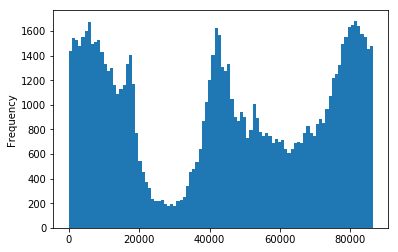

In [29]:
json_df['second'].plot.hist(bins=96)

<h1>Part 2 ‑ Experiment and metrics design</h1>
<p>The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.<br>
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?<br>
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br>
&nbsp;&nbsp;a. how you will implement the experiment<br>
&nbsp;&nbsp;b. what statistical test(s) you will conduct to verify the significance of the
observation<br>
&nbsp;&nbsp;c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.<br>
</p>

<p>1. The key metric to measure would be the reimbursed toll costs. For a one metric study this would be adequate however other additional measurements exist and should be considered. The Singapore Taxi study as detailed in <a href="https://semanticommunity.info/Data_Science/Data_Science_for_Tackling_the_Challenges_of_Big_Data#Story">this study</a> shows how additional data can give a more detailed understanding of taxi movement. Putting GPS sensors and recording receipts in a few taxis gives a deeper understanding of traffic, taxi usage, and the ability to model the data. In general reimbursed tolls would be the best metric, if you are not allowed to incorporate receipts. If you can incorporate receipts GPS data is more useful. In this case the key measure of success will be when a taxi crosses between cities while not driving for a fare, and then proceeds to take a parameter N innercity fares. This would filter out traveling home, intercity travel, and personal travel.<br>
2. In general there are many ways to perform this experiment using the given resources as long as the results of the experiment are communicated accurately, as to not imply false conclusions to a descision making body. In the design of this experiment, modifications to an ideal experiemnt will be presented as to make the experiment possible.<br>
To implement the study I would include GPS monitors in a few taxis and combine their data with taxi reciepts. The drives given reimbursments would be randomly assigned in the monitored taxis. As time increases more reimbursments should be added to include the effect of an increase in supply. The period of the experiment would need to include weekdays, weekends, and holidays. If seasonal changes in population occur, such as in vacation, agricultural or industrial cities, data would also be needed for these periods.<br>
If a sweeping policy will be implemented, data needs to be taken for both before and after the toll reimbursment program. As certain situations, like Christmas, occur only once a year, a two year period is the minimal period needed to model the data. If the reimbursments can be randomly assigned, the time required maybe halved. A smaller period of a couple weeks maybe used as long as different measurement periods are in the same season and encompass the same number of weekdays, weekends, and holidays. A smaller time period would estimate the effectiveness of the program and a longer time period would allow for modeling the effect of the program.<br>
The statistical signifigance of the difference in the models could be estimated using the bootstrap method. The usage of the program will be a binary measurement and the ratio of usage may be measured for groups of interest. The experiment can also measure additional differences in parameters such as traffic, moving violations, and accidents based on the distribution of reimbursments.<br>
If the experiment measures data during different traffic needs, and with varying levels randomly distributed reimbursed drivers several recomendations can be made. With GPS data you can adjust the number of randomly distributed reimbursed drivers to maximize the area covered by taxis. Ideally you would want an empty taxi on every street. You can also make a recomendation to maximize the number of drivers crossing between cities. Additionally you can minimize travel time for comuters. Less drivers would aleviate traffic and may reduce the tavel time for comuters. As accidents and traffic also increase the cost to a city the expense of the city may also minimized with this program. Recommendations should be presented to focus on the needs of a decision making team. </p>

<h1>Part 3 ‑ Predictive modeling</h1>
<p>Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.<br><br>
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.<br><br>
<b>1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
    fraction of the observed users were retained?</b><br>
I kept all of the data. For the missing values I filled in the average values.<br><br>
<b>2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
    alternatives you considered, and any concerns you have. How valid is your model?</b>
Include any key indicators of model performance.<br>
I used logistic regression to fit the data. I used logistic regression because it fit the data better than a random forrest and the multinomial. The model had an accuracy score of 0.72, so it is working but not great.<br><br>
<b>3. Briefly discuss how Ultimate might leverage the insights gained from the model to
    improve its long­term rider retention (again, a few sentences will suffice).</b><br>
I discovered the measurements that effected retention the most was the number of trips taken in the first month and the if they took an Ultimate Black in their first 30 days.<br><br>
Data description<br><br>
● city: city this user signed up in<br>
● phone: primary device for this user<br>
● signup_date: date of account registration; in the form ‘YYYYMMDD’<br>
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’<br>
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
● surge_pct: the percent of trips taken with surge multiplier > 1<br>
● avg_surge: The average surge multiplier over all of this user’s trips<br>
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up<br>
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday</p>

In [11]:
with open(directory+'ultimate_data_challenge.json') as f:
   data = json.load(f)
print(data)

#ultimate_df = pd.read_json(directory+'ultimate_data_challenge.json')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [160]:
!cat /mnt/c/users/我的电脑/desktop/springboard/ultimate_challenge/fixer.py













pd.read_json(data_line)

In [209]:
data = pd.read_json(directory+'udc.json')
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [210]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'],format = '%Y-%m-%d')
data['signup_date'] = pd.to_datetime(data['signup_date'],format = '%Y-%m-%d')

In [211]:
max_date = data['last_trip_date'].max()
max_date

Timestamp('2014-07-01 00:00:00')

In [212]:
min_date = data['signup_date'].min()
min_date

Timestamp('2014-01-01 00:00:00')

In [213]:
data['signup_day']=data.apply((lambda row: (row['signup_date']-min_date).days),axis=1)

In [214]:
data['active_user'] = data.apply((lambda row: row['last_trip_date'].month==6), axis=1)

In [215]:
data['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [216]:
data_k=data[data['city']=="King's Landing"]
print(sum(data_k['active_user'])/len(data_k['active_user']))
data_a=data[data['city']=="Astapor"]
print(sum(data_a['active_user'])/len(data_a['active_user']))
data_w=data[data['city']=="Winterfell"]
print(sum(data_w['active_user'])/len(data_w['active_user']))

0.6080947680157947
0.2497278335550986
0.341403839561193


In [217]:
data.city = data.city.replace({"King's Landing":"2", "Astapor":"0", "Winterfell":"1"})
data.astype({'city': 'int32'}).dtypes
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_day,active_user
0,3.67,5.0,4.7,1.10,2,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,24,True
1,8.26,5.0,5.0,1.00,0,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,28,False
2,0.77,5.0,4.3,1.00,0,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,5,False
3,2.36,4.9,4.6,1.14,2,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,9,True
4,3.13,4.9,4.4,1.19,1,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,26,False


In [218]:
data['phone'].unique()

array(['iPhone', 'Android', 'None'], dtype=object)

In [219]:
data_i=data[data['phone']=="iPhone"]
print(sum(data_i['active_user'])/len(data_i['active_user']))
data_a=data[data['phone']=="Android"]
print(sum(data_a['active_user'])/len(data_a['active_user']))
data_n=data[data['phone']=="None"]
print(sum(data_n['active_user'])/len(data_n['active_user']))

0.4357180035856804
0.20356810011982426
0.3282828282828283


In [220]:
data.phone = data.phone.replace({"iPhone":"2", "Android":"0", "None":"1"})
data.astype({'phone': 'int32'}).dtypes
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_day,active_user
0,3.67,5.0,4.7,1.10,2,2014-06-17,2,2014-01-25,15.4,4,True,46.2,24,True
1,8.26,5.0,5.0,1.00,0,2014-05-05,0,2014-01-29,0.0,0,False,50.0,28,False
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,3,False,100.0,5,False
3,2.36,4.9,4.6,1.14,2,2014-06-29,2,2014-01-10,20.0,9,True,80.0,9,True
4,3.13,4.9,4.4,1.19,1,2014-03-15,0,2014-01-27,11.8,14,False,82.4,26,False


In [221]:
data.ultimate_black_user = data.ultimate_black_user.replace({True:1, False:0})
data.active_user = data.active_user.replace({True:1, False:0})
data.astype({'ultimate_black_user': 'int32'}).dtypes
data.astype({'active_user': 'int32'}).dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                int64
weekday_pct                      float64
signup_day                         int64
active_user                        int32
dtype: object

In [222]:
data_by = data[data['avg_rating_by_driver']!=-1.0]
by_rating_average = sum(data_by['avg_rating_by_driver'])/len(data_by)
data_of = data[data['avg_rating_of_driver']!=-1.0]
of_rating_average = sum(data_of['avg_rating_of_driver'])/len(data_of)
data.avg_rating_by_driver = data.avg_rating_by_driver.replace({-1.0:by_rating_average})
data.avg_rating_of_driver = data.avg_rating_of_driver.replace({-1.0:of_rating_average})


In [223]:
data = data.drop(['last_trip_date', 'signup_date'],axis=1)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_day,active_user
0,3.67,5.0,4.7,1.10,2,2,15.4,4,1,46.2,24,1
1,8.26,5.0,5.0,1.00,0,0,0.0,0,0,50.0,28,0
2,0.77,5.0,4.3,1.00,0,2,0.0,3,0,100.0,5,0
3,2.36,4.9,4.6,1.14,2,2,20.0,9,1,80.0,9,1
4,3.13,4.9,4.4,1.19,1,0,11.8,14,0,82.4,26,0


In [242]:
corr = data.corr()
corr['active_user']

avg_dist                 -0.086937
avg_rating_by_driver     -0.025986
avg_rating_of_driver     -0.012135
avg_surge                -0.003630
surge_pct                 0.010323
trips_in_first_30_days    0.193932
ultimate_black_user       0.200222
weekday_pct               0.003674
signup_day               -0.017954
active_user               1.000000
Name: active_user, dtype: float64

In [252]:
# Split the data into a training and test set.
x_train, x_test, y_train, y_test = train_test_split(data[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge',
                                                   'city','phone','surge_pct','trips_in_first_30_days','ultimate_black_user',
                                                   'weekday_pct','signup_day']].values, 
                                              (data.active_user == 1).values,test_size=0.2,random_state=5)


clf = LogisticRegression(solver='lbfgs')
# Fit the model on the trainng data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7148


/home/bentrey/myProjectDir/myProjectEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [253]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(x_train, y_train)
temp_score = clf.score(x_test, y_test)
print(temp_score)

0.2869940871753446


In [254]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
temp_score = clf.score(x_test, y_test)
print(temp_score)

0.6478


In [255]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
for c in Cs:
    clf = LogisticRegression(C=c, solver='lbfgs',max_iter=3000)
    clf.fit(x_train, y_train)
    accuracy = accuracy_score(clf.predict(x_test), y_test)
    print("C:",c," score:",accuracy)

C: 0.001  score: 0.7146
C: 0.1  score: 0.7153
C: 1  score: 0.7156
C: 10  score: 0.7152
C: 100  score: 0.7152


In [256]:
#the grid of parameters to search over
iters = [100, 500, 1000, 2000, 4000]

# your turn
for it in iters:
    clf = LogisticRegression(C=0.1, solver='lbfgs',max_iter=it)
    clf.fit(x_train, y_train)
    accuracy = accuracy_score(clf.predict(x_test), y_test)
    print("max_iters:",it," score:",accuracy)

/home/bentrey/myProjectDir/myProjectEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


max_iters: 100  score: 0.7141
max_iters: 500  score: 0.7153
max_iters: 1000  score: 0.7153
max_iters: 2000  score: 0.7153
max_iters: 4000  score: 0.7153
